## Observations and Insights 

In [1]:
# Observations and Insights

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st
import pandas as pd

# Study data files
airport_weather_path = "../data/LosAngeles2014-2019annual.csv"

# Read the mouse data and the study results
airport_weather = pd.read_csv(airport_weather_path)

# Combine the data into a single dataset
airport_weather_data_df = pd.DataFrame(airport_weather)

# Display the data table for preview
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,NaN,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,NaN,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,NaN,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,NaN,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,NaN,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,NaN,64.0,70.8,57.1,270,320,38.0,51.0


In [37]:
# Checking the number of mice.
airport_weather_data_days = airport_weather_data_df["DATE"].value_counts().count()
print(airport_weather_data_days)

6


In [38]:
#airport_weather_data_df = airport_weather_data_df.rename(columns={"AWND" : "Average wind speed"})
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,NaN,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,NaN,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,NaN,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,NaN,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,NaN,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,NaN,64.0,70.8,57.1,270,320,38.0,51.0


In [39]:
airport_weather_data_df['DSND'] = airport_weather_data_df['DSND'].fillna(0)
airport_weather_data_df['DSNW'] = airport_weather_data_df['DSNW'].fillna(0)
airport_weather_data_df['EMSD'] = airport_weather_data_df['EMSD'].fillna(0)
airport_weather_data_df['EMSN'] = airport_weather_data_df['EMSN'].fillna(0)
airport_weather_data_df['SNOW'] = airport_weather_data_df['SNOW'].fillna(0)
#airport_weather_data_df['WT03'] = airport_weather_data_df['WT03'].fillna(0)
#airport_weather_data_df['WT04'] = airport_weather_data_df['WT04'].fillna(0)
#airport_weather_data_df['WT05'] = airport_weather_data_df['WT05'].fillna(0)
#airport_weather_data_df['WT06'] = airport_weather_data_df['WT06'].fillna(0)
#airport_weather_data_df['WT08'] = airport_weather_data_df['WT08'].fillna(0)
#airport_weather_data_df['WT09'] = airport_weather_data_df['WT09'].fillna(0)

airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0


In [40]:
for col in airport_weather_data_df.columns:
    print(col)

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
AWND
CDSD
CLDD
DP01
DP10
DSND
DSNW
DT00
DT32
DX32
DX70
DX90
EMNT
EMSD
EMSN
EMXP
EMXT
HDSD
HTDD
PRCP
SNOW
TAVG
TMAX
TMIN
WDF2
WDF5
WSF2
WSF5


In [41]:
airport_weather_data_df = airport_weather_data_df.rename(columns={"AWND" : "Average wind speed",
                                                                  "CDSD" : "Cooling Degree Days (season-to-date)",
                                                                  "CLDD" : "Cooling Degree Days", 
                                                                  "DP01" : "Number of Days with >=0.01 inch", 
                                                                  "DP10" : "Number of Days with >=0.1 inch", 
                                                                  "DSND" : "Number of Days with Snow Depth >= 1 inch", 
                                                                  "DSNW" : "Number of Days with Snowfall >= 1 inch", 
                                                                  "DT00" : "Number of Days with Max Temp <= 0 degrees F", 
                                                                  "DT32" : "Number of Days with Max Temp <= 32 degrees F", 
                                                                  "DX32" : "Number of Days with Max Temp >= 32 degrees F",
                                                                  "DX70" : "Number of Days with Max temp >= 70 degrees F", 
                                                                  "DX90" : "Number of Days with Max temp >= 90 degrees F", 
                                                                  "EMNT" : "Extreme Minimum Temp", 
                                                                  "EMSD" : "Highest Daily Snow Depth", 
                                                                  "EMSN" : "Highest Daily Snowfall", 
                                                                  "EMXP" : "Highest Daily Preciptation", 
                                                                  "EMXT" : "Extreme Maximum Temp", 
                                                                  "HDSD" : "Heating Degree Days (season-to-date)",
                                                                  "HTDD" : "Heating Degree Days",
                                                                  "PRCP" : "Preciption",
                                                                  "SNOW" : "Snowfall",
                                                                  "TAVG" : "Average Temperature",
                                                                  "TMAX" : "Maximum Temperature", 
                                                                  "TMIN" : "Minimum Temperature",
                                                                  "WDF2" : "Direction of fastest 2-minute wind",
                                                                  "WDF5" : "Direction of fastest 5-minute wind", 
                                                                  "WSF2" : "Fastest 2-minute wind",
                                                                  "WSF5" : "Fastest 5-minute wind"})
#                                                                  "WT01" : "Fog, ice fog, or freezing fog",
#                                                                  "WT02" : "Heavy fog or heaving freezing fog",
#                                                                  "WT03" : "Thunder",
#                                                                  "WT04" : "Ice pellets, sleet, snow pellets, or small hail",
#                                                                  "WT05" : "Hail (may include small hail)",
#                                                                  "WT06" : "Glaze or rime",
#                                                                  "WT08" : "Smoke or haze"})
#                                                                  "WT09" : "Blowing or drifting snow"}) 

In [42]:
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Cooling Degree Days (season-to-date),Cooling Degree Days,Number of Days with >=0.01 inch,...,Heating Degree Days,Preciption,Snowfall,Average Temperature,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0


In [43]:
airport_weather_data_df.to_csv(r'../data/Cleansed Annual Weather Data LAX.csv', index = False)

In [44]:
# Study data files
airport_weather_annual_path = "../data/LosAngeles2014-2019annual.csv"

# Read the mouse data and the study results
airport_weather_annual = pd.read_csv(airport_weather_annual_path)

# Combine the data into a single dataset
airport_weather_data_annual_df = pd.DataFrame(airport_weather_annual)

# Display the data table for preview
airport_weather_data_annual_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,NaN,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,NaN,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,NaN,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,NaN,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,NaN,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,NaN,64.0,70.8,57.1,270,320,38.0,51.0


In [45]:
airport_weather_data_annual_df.value_counts()

Series([], dtype: int64)

In [46]:
airport_weather = pd.DataFrame(airport_weather_data_annual_df, columns = ['DATE','DP01','DP10',
                                                                          'DX70','DX90','EMNT','EMXP','EMXT'
                                                                          ,'TAVG','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5'])
airport_weather.head(100)

,DATE,DP01,DP10,DX70,DX90,EMNT,EMXP,EMXT,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2014,23,15,241,8,40,1.56,97,66.0,72.9,59.1,270,270,36.9,44.1
1,2015,29,15,223,7,36,1.80,99,65.6,72.7,58.4,270,270,36.9,40.9
2,2016,38,22,201,6,41,1.42,101,64.8,71.9,57.8,260,260,46.1,53.0
3,2017,36,16,234,12,40,2.94,104,65.1,72.4,57.8,270,110,36.0,45.0
4,2018,25,13,226,4,40,1.49,94,65.2,72.2,58.3,260,270,36.9,44.1
5,2019,46,28,197,11,39,1.68,98,64.0,70.8,57.1,270,320,38.0,51.0


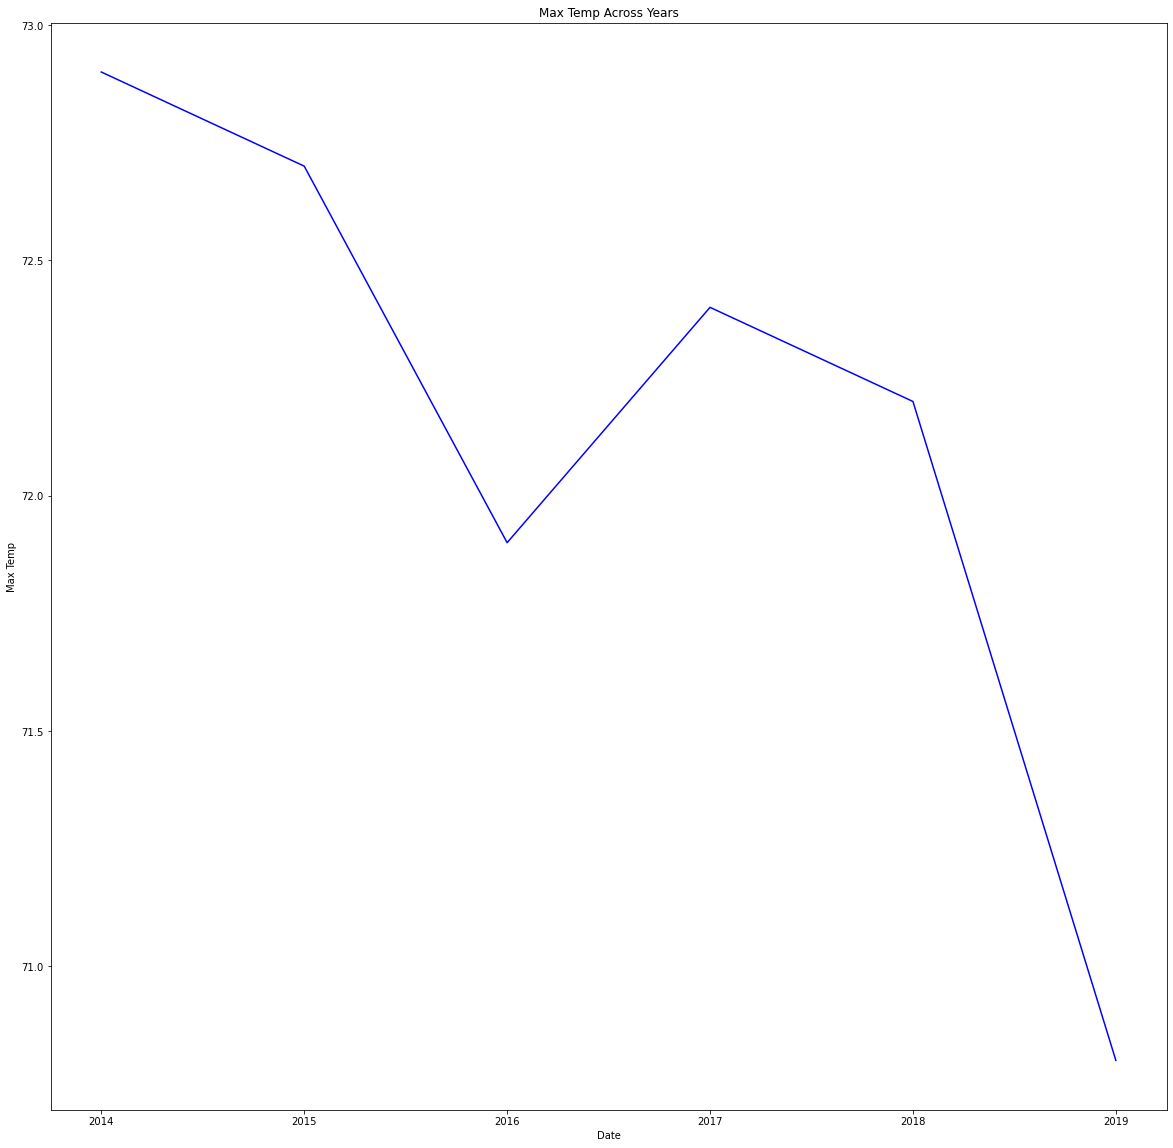

In [52]:
fig, ax = plt.subplots(figsize=(20, 20))

# Add x-axis and y-axis
ax.plot(airport_weather['DATE'],
        airport_weather['TMAX'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Max Temp",
       title="Max Temp Across Years")

plt.show()

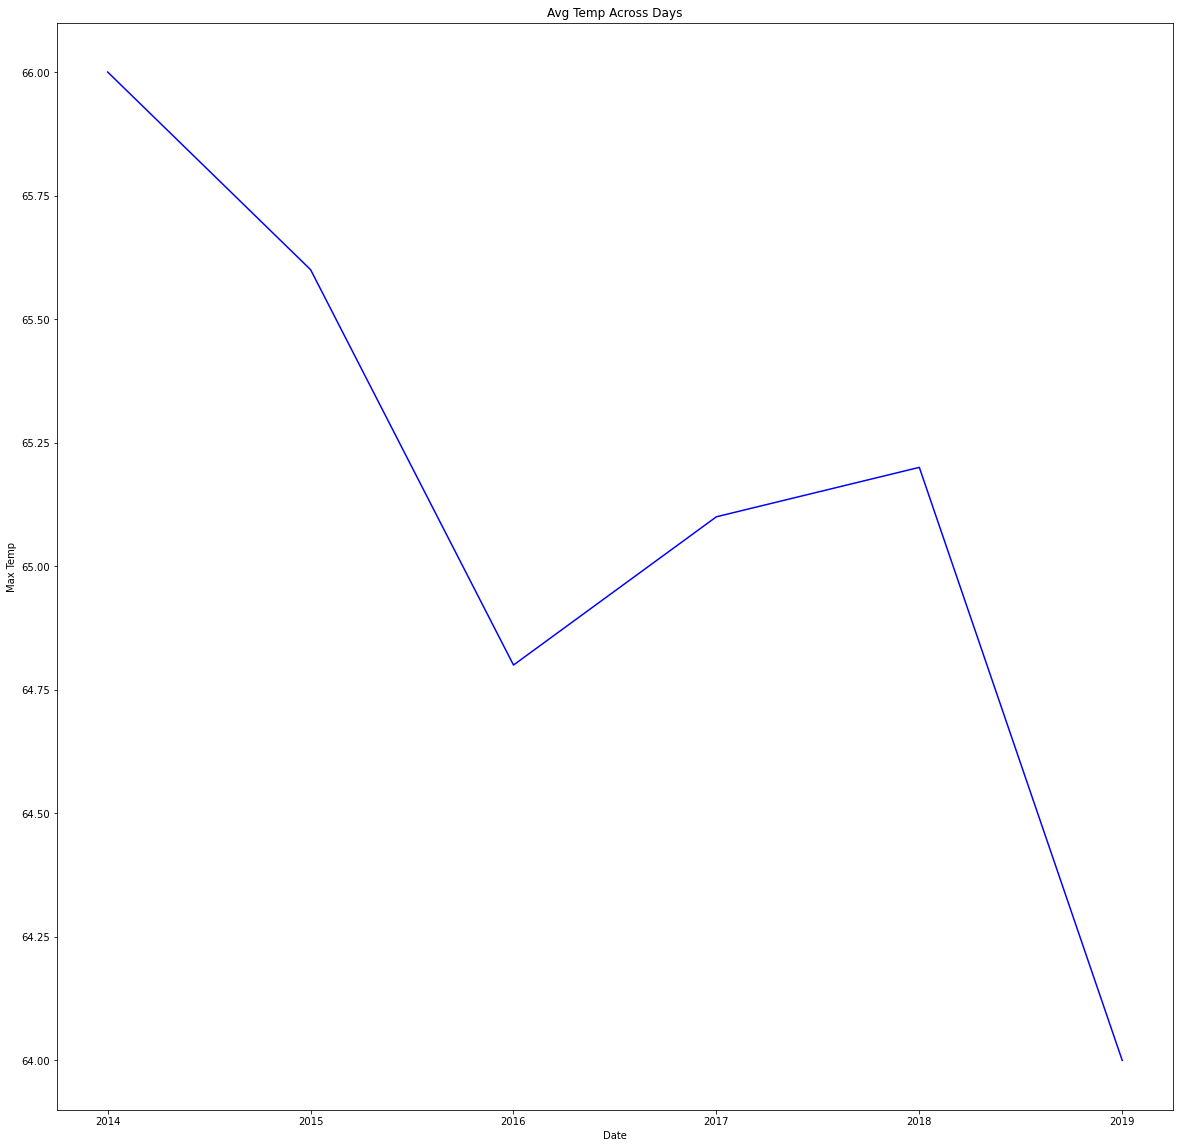

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))

# Add x-axis and y-axis
ax.plot(airport_weather['DATE'],
        airport_weather['TAVG'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Max Temp",
       title="Avg Temp Across Days")

plt.show()

In [53]:
# Study data files
airport_weather_path = "../data/LAX2014-2019.csv"

# Read the mouse data and the study results
airport_weather = pd.read_csv(airport_weather_path)

# Combine the data into a single dataset
airport_weather_data_df = pd.DataFrame(airport_weather)

# Display the data table for preview
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,...,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/1/2014,3.58,NaN,0.00,NaN,...,64,46,260,220.0,10.1,16.1,NaN,NaN,NaN,NaN
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/2/2014,4.92,NaN,0.00,NaN,...,78,50,270,270.0,12.1,14.1,1.0,NaN,NaN,NaN
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/3/2014,3.80,NaN,0.00,NaN,...,64,47,250,270.0,13.0,17.0,NaN,NaN,NaN,NaN
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/4/2014,4.03,NaN,0.00,NaN,...,65,50,260,280.0,10.1,14.1,NaN,NaN,NaN,NaN
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/5/2014,4.03,NaN,0.00,NaN,...,76,47,270,290.0,14.1,16.1,NaN,NaN,NaN,NaN
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/6/2014,3.80,NaN,0.00,NaN,...,78,50,270,NaN,14.1,NaN,NaN,NaN,NaN,NaN
6,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/7/2014,3.58,NaN,0.00,NaN,...,69,51,280,280.0,13.0,15.0,NaN,NaN,NaN,NaN
7,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/8/2014,3.80,NaN,0.00,NaN,...,66,49,250,250.0,13.0,16.1,NaN,NaN,NaN,NaN
8,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/9/2014,5.59,NaN,0.00,NaN,...,60,50,270,270.0,18.1,21.0,NaN,NaN,NaN,NaN
9,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/10/2014,3.36,NaN,0.00,NaN,...,65,48,280,260.0,12.1,14.1,NaN,NaN,NaN,NaN


In [54]:
airport_weather_data_df.iloc[:365,:]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,...,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/1/2014,3.58,NaN,0.00,NaN,...,64,46,260,220.0,10.1,16.1,NaN,NaN,NaN,NaN
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/2/2014,4.92,NaN,0.00,NaN,...,78,50,270,270.0,12.1,14.1,1.0,NaN,NaN,NaN
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/3/2014,3.80,NaN,0.00,NaN,...,64,47,250,270.0,13.0,17.0,NaN,NaN,NaN,NaN
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/4/2014,4.03,NaN,0.00,NaN,...,65,50,260,280.0,10.1,14.1,NaN,NaN,NaN,NaN
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/5/2014,4.03,NaN,0.00,NaN,...,76,47,270,290.0,14.1,16.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,12/27/2014,5.14,NaN,0.00,NaN,...,59,40,240,230.0,13.0,17.0,NaN,NaN,NaN,NaN
361,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,12/28/2014,4.70,NaN,0.00,NaN,...,59,42,260,240.0,13.0,15.0,NaN,NaN,NaN,NaN
362,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,12/29/2014,4.03,NaN,0.00,NaN,...,60,42,270,260.0,10.1,14.1,NaN,NaN,NaN,NaN
363,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,12/30/2014,8.50,NaN,0.31,NaN,...,58,46,90,90.0,21.0,25.1,1.0,NaN,NaN,NaN


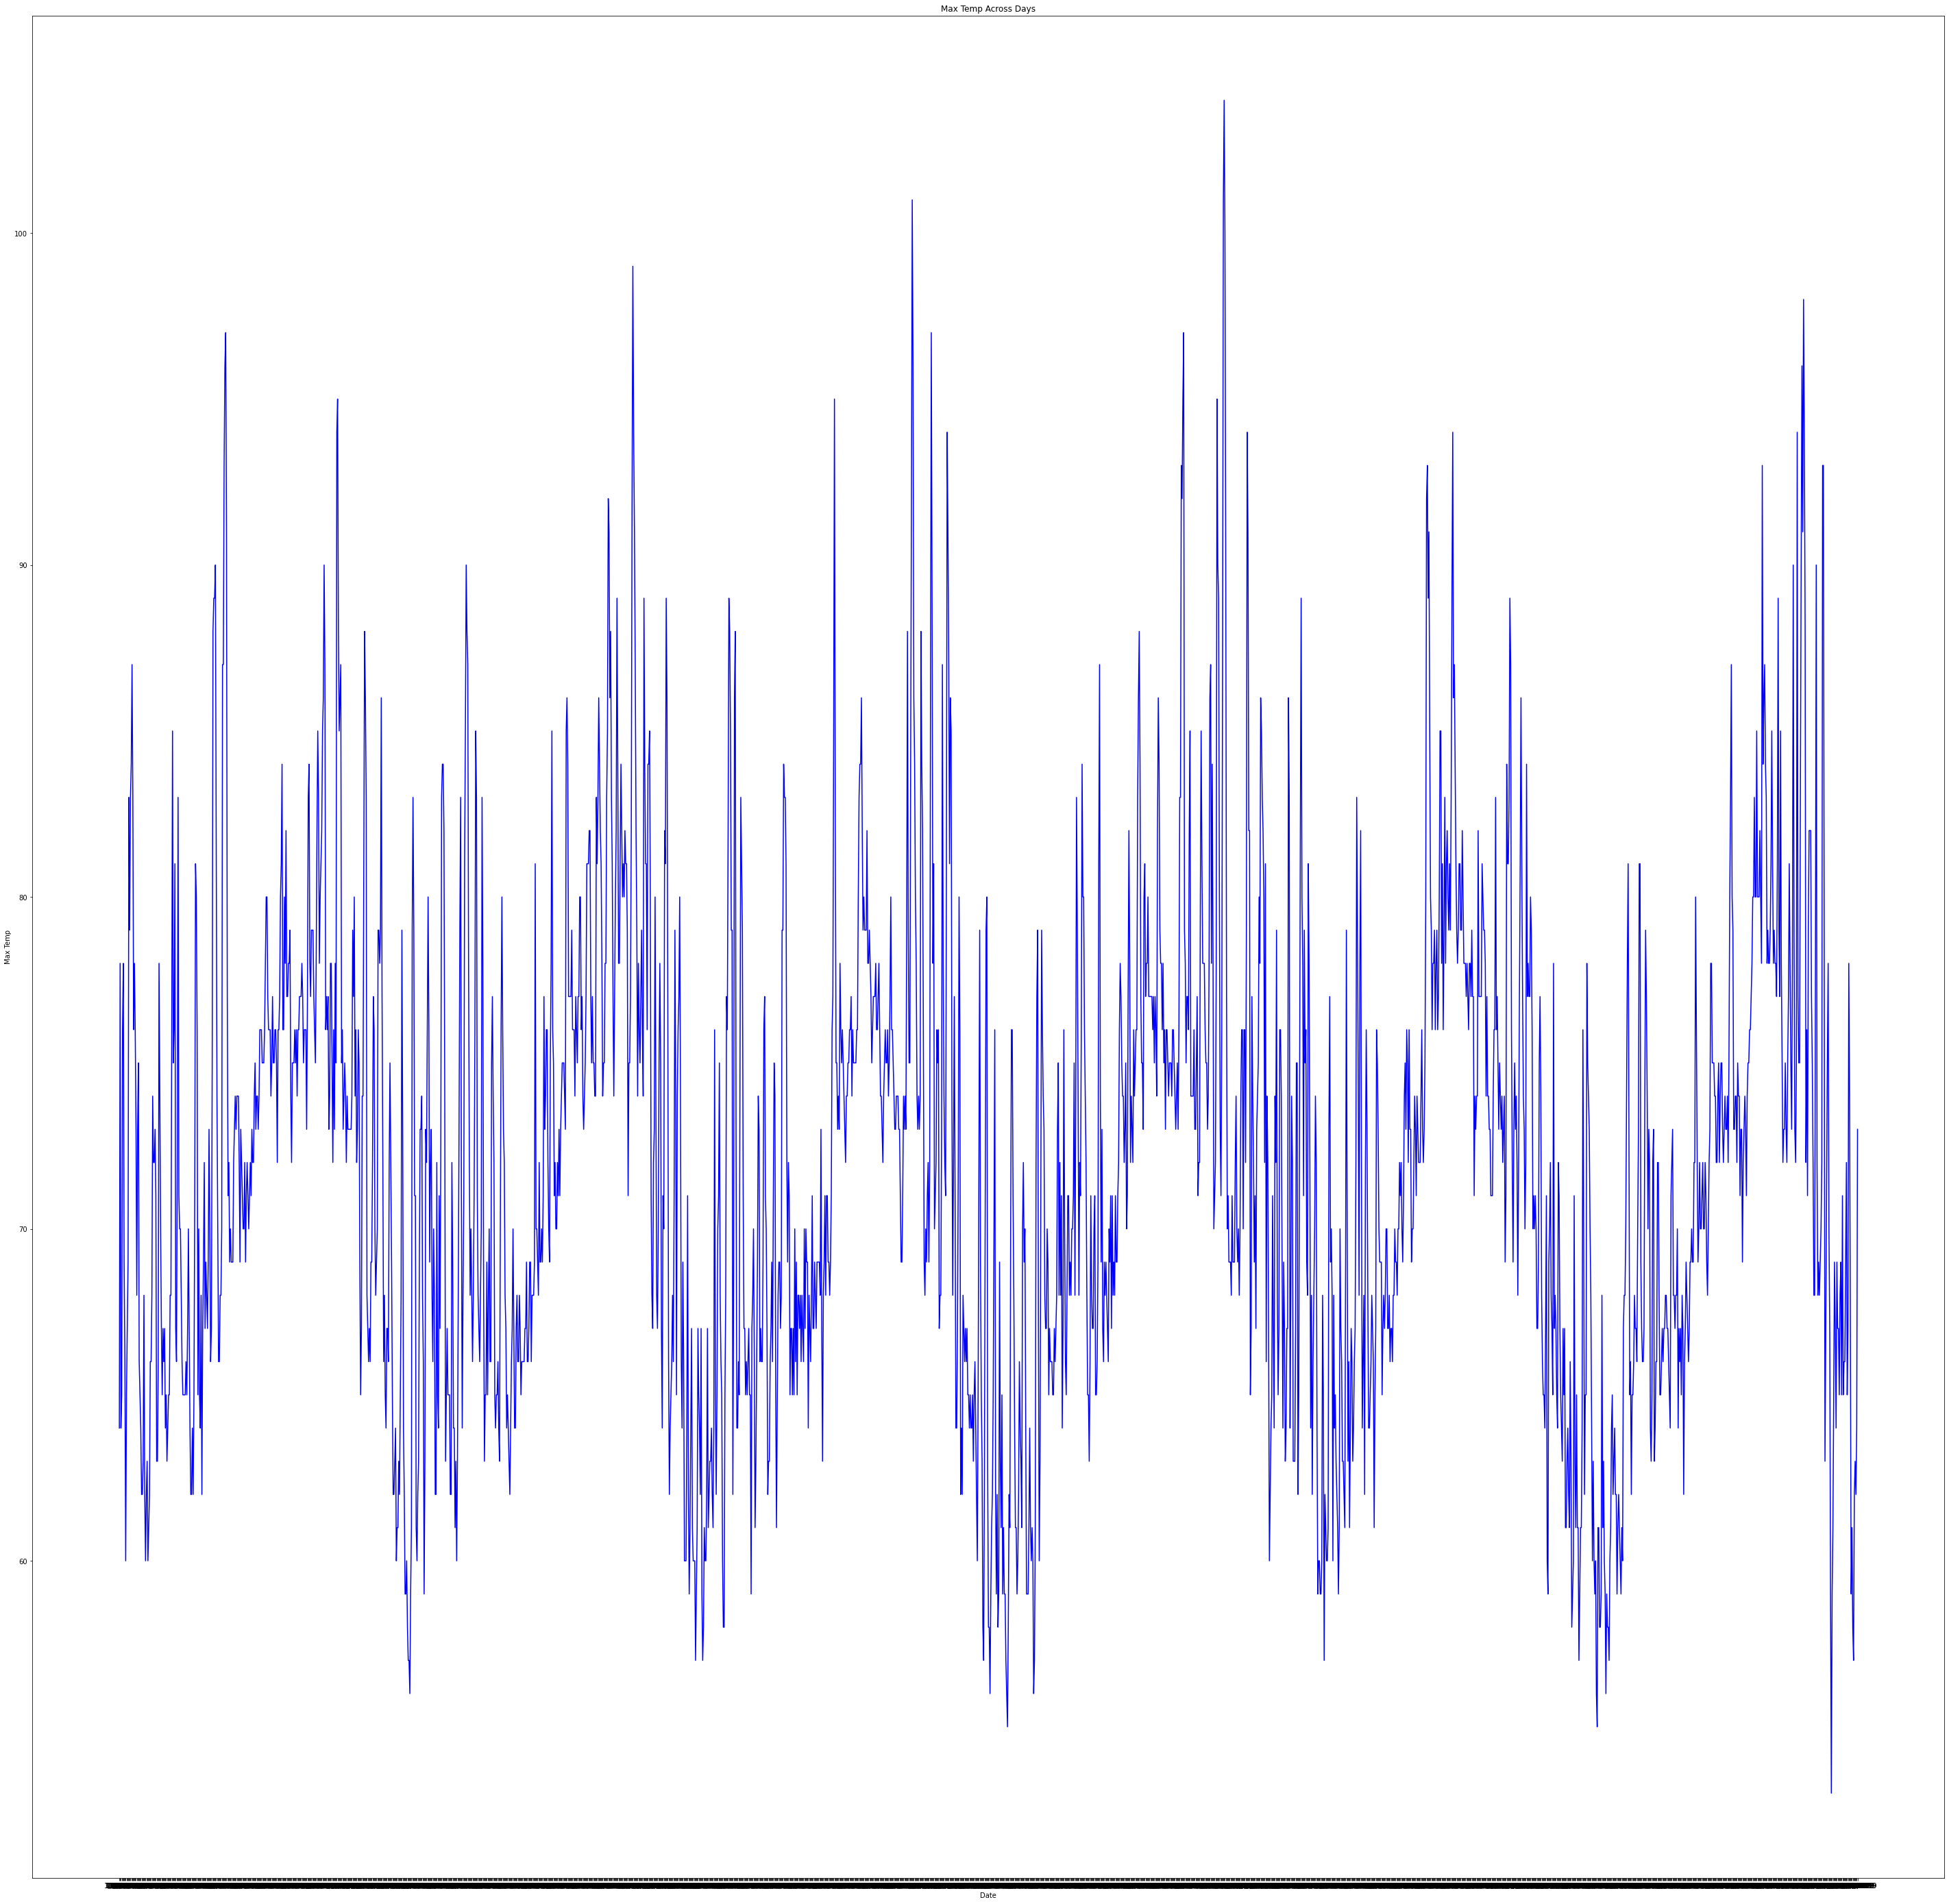

In [58]:
fig, ax = plt.subplots(figsize=(50, 50))

# Add x-axis and y-axis
ax.plot(airport_weather_data_df['DATE'],
        airport_weather['TMAX'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Max Temp",
       title="Max Temp Across Days")

# plt.locator_params(axis='x', nbins=300)

# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

plt.show()

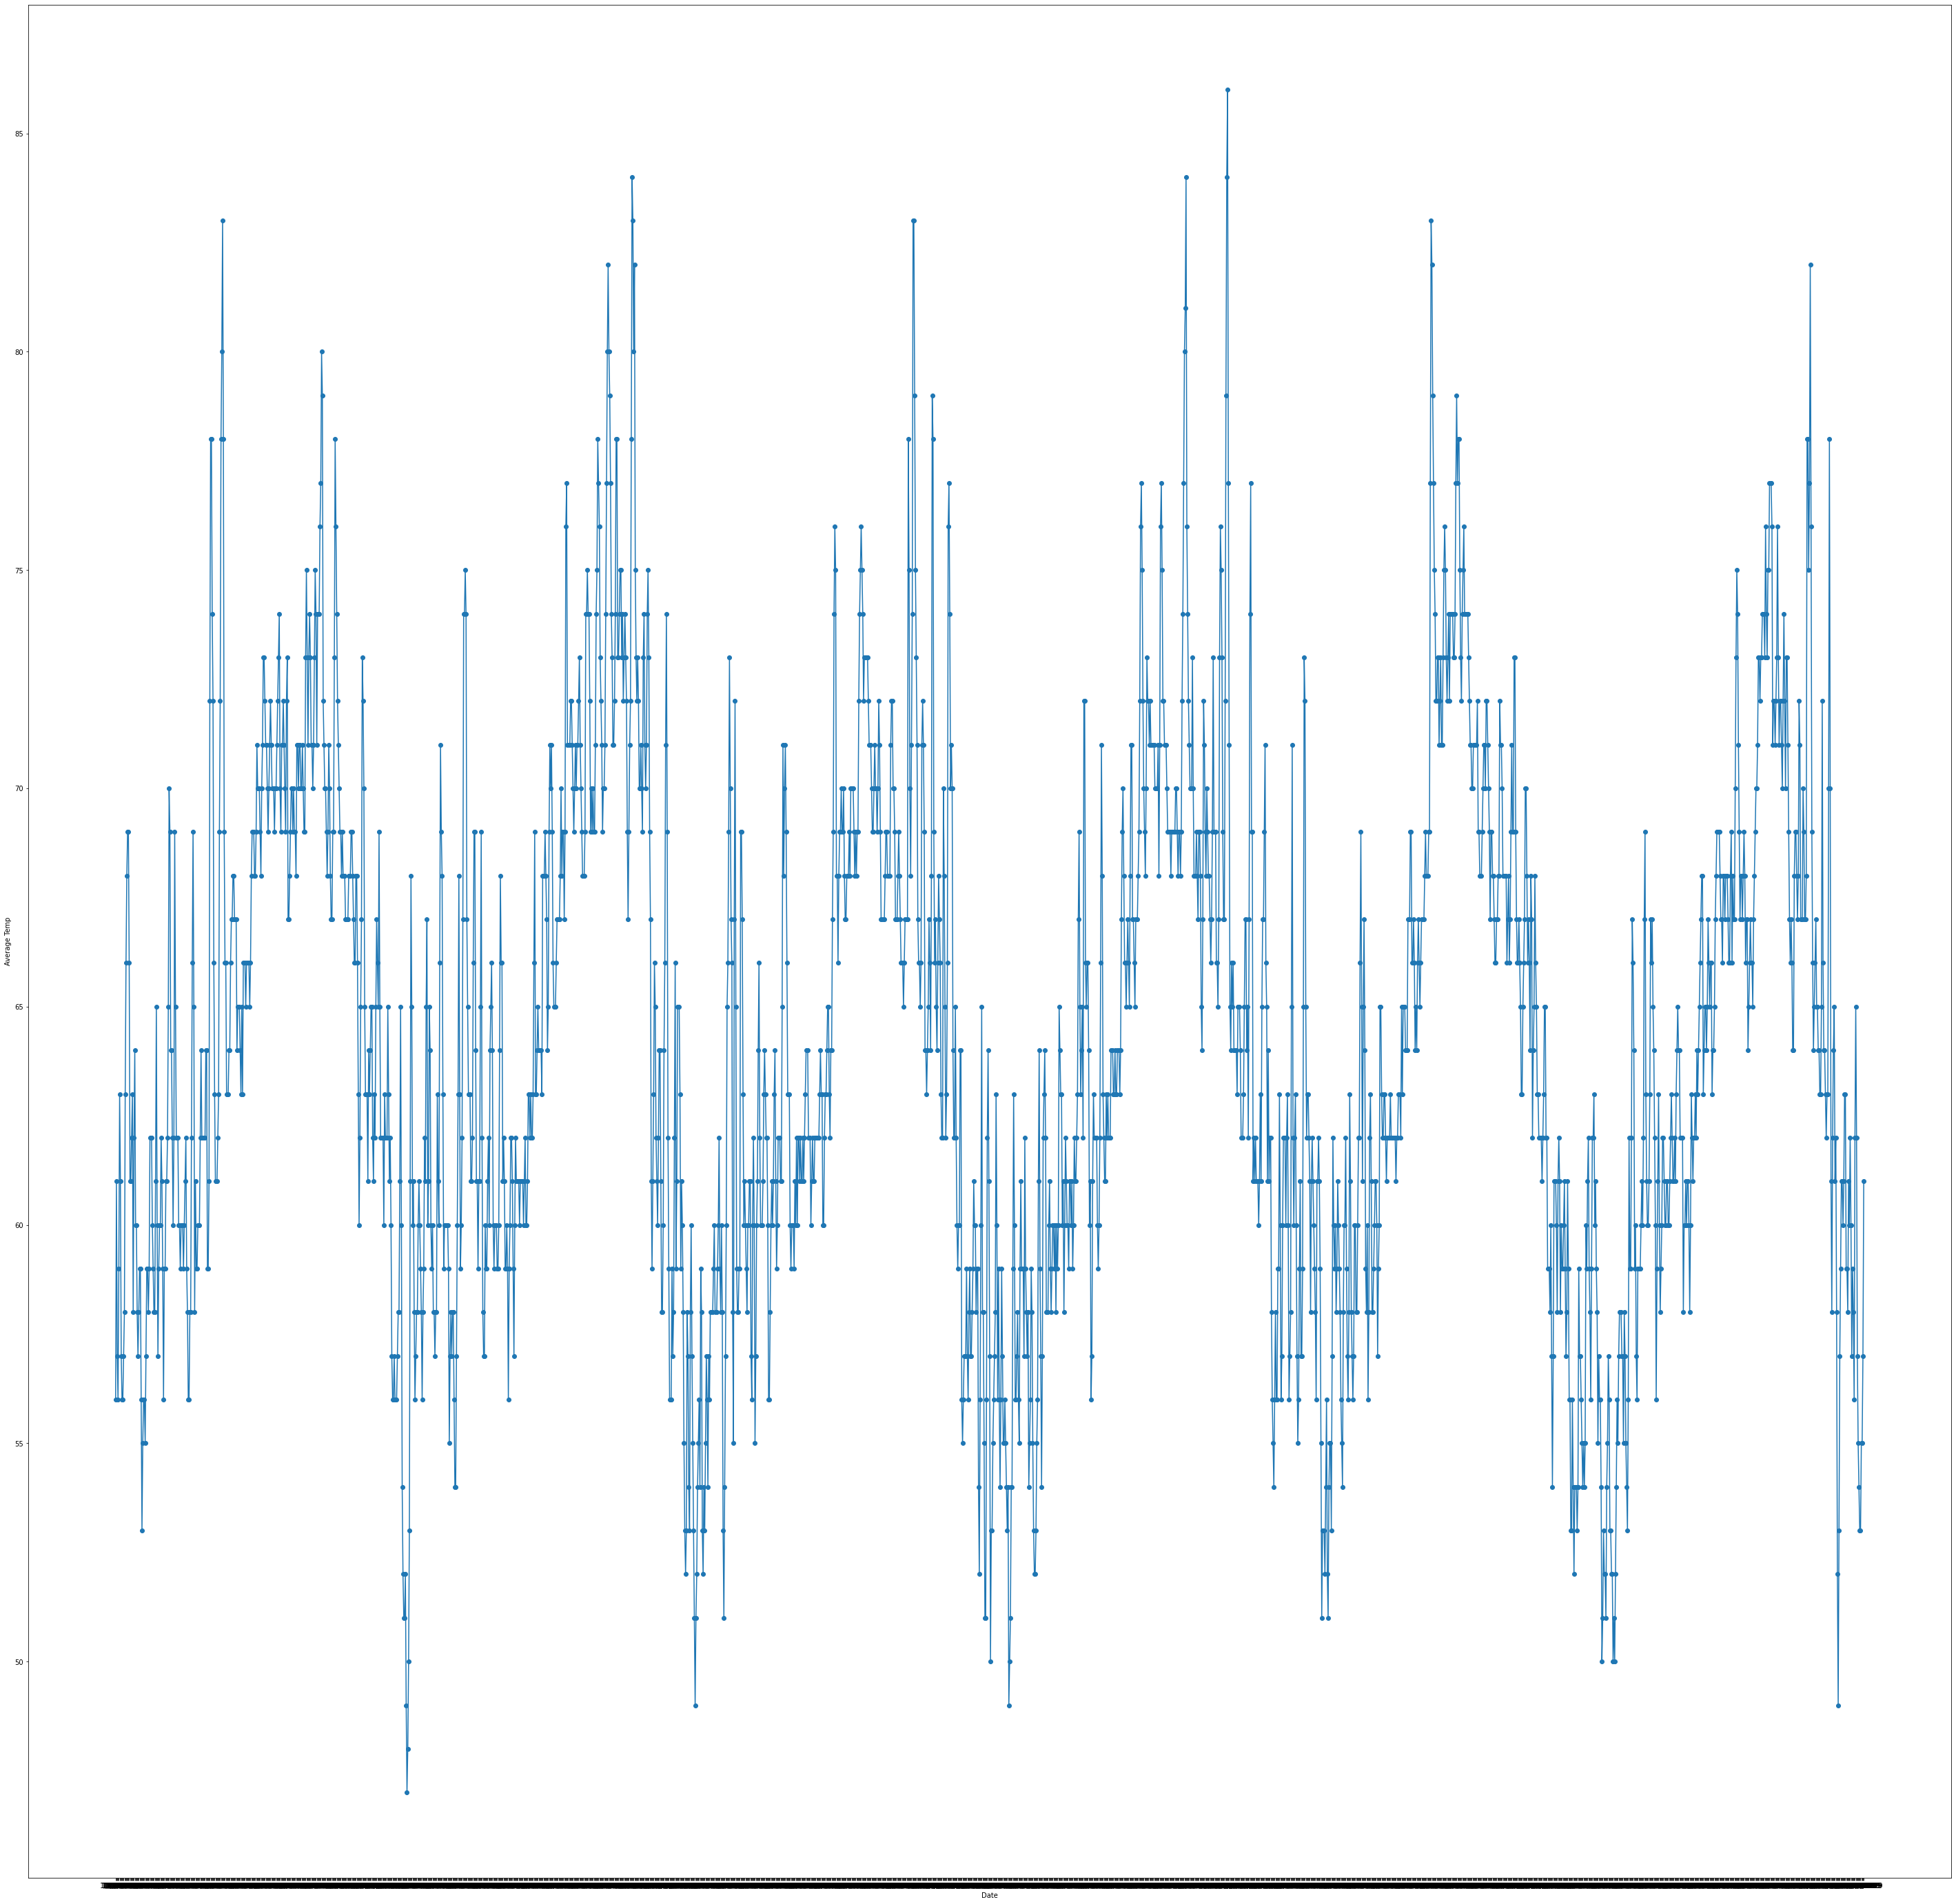

In [59]:
fig,ax=plt.subplots(figsize=(50, 50))
ax.plot(airport_weather_data_df['DATE'],airport_weather['TAVG'], marker="o")
ax.set_xlabel("Date")
ax.set_ylabel("Average Temp")
plt.show()

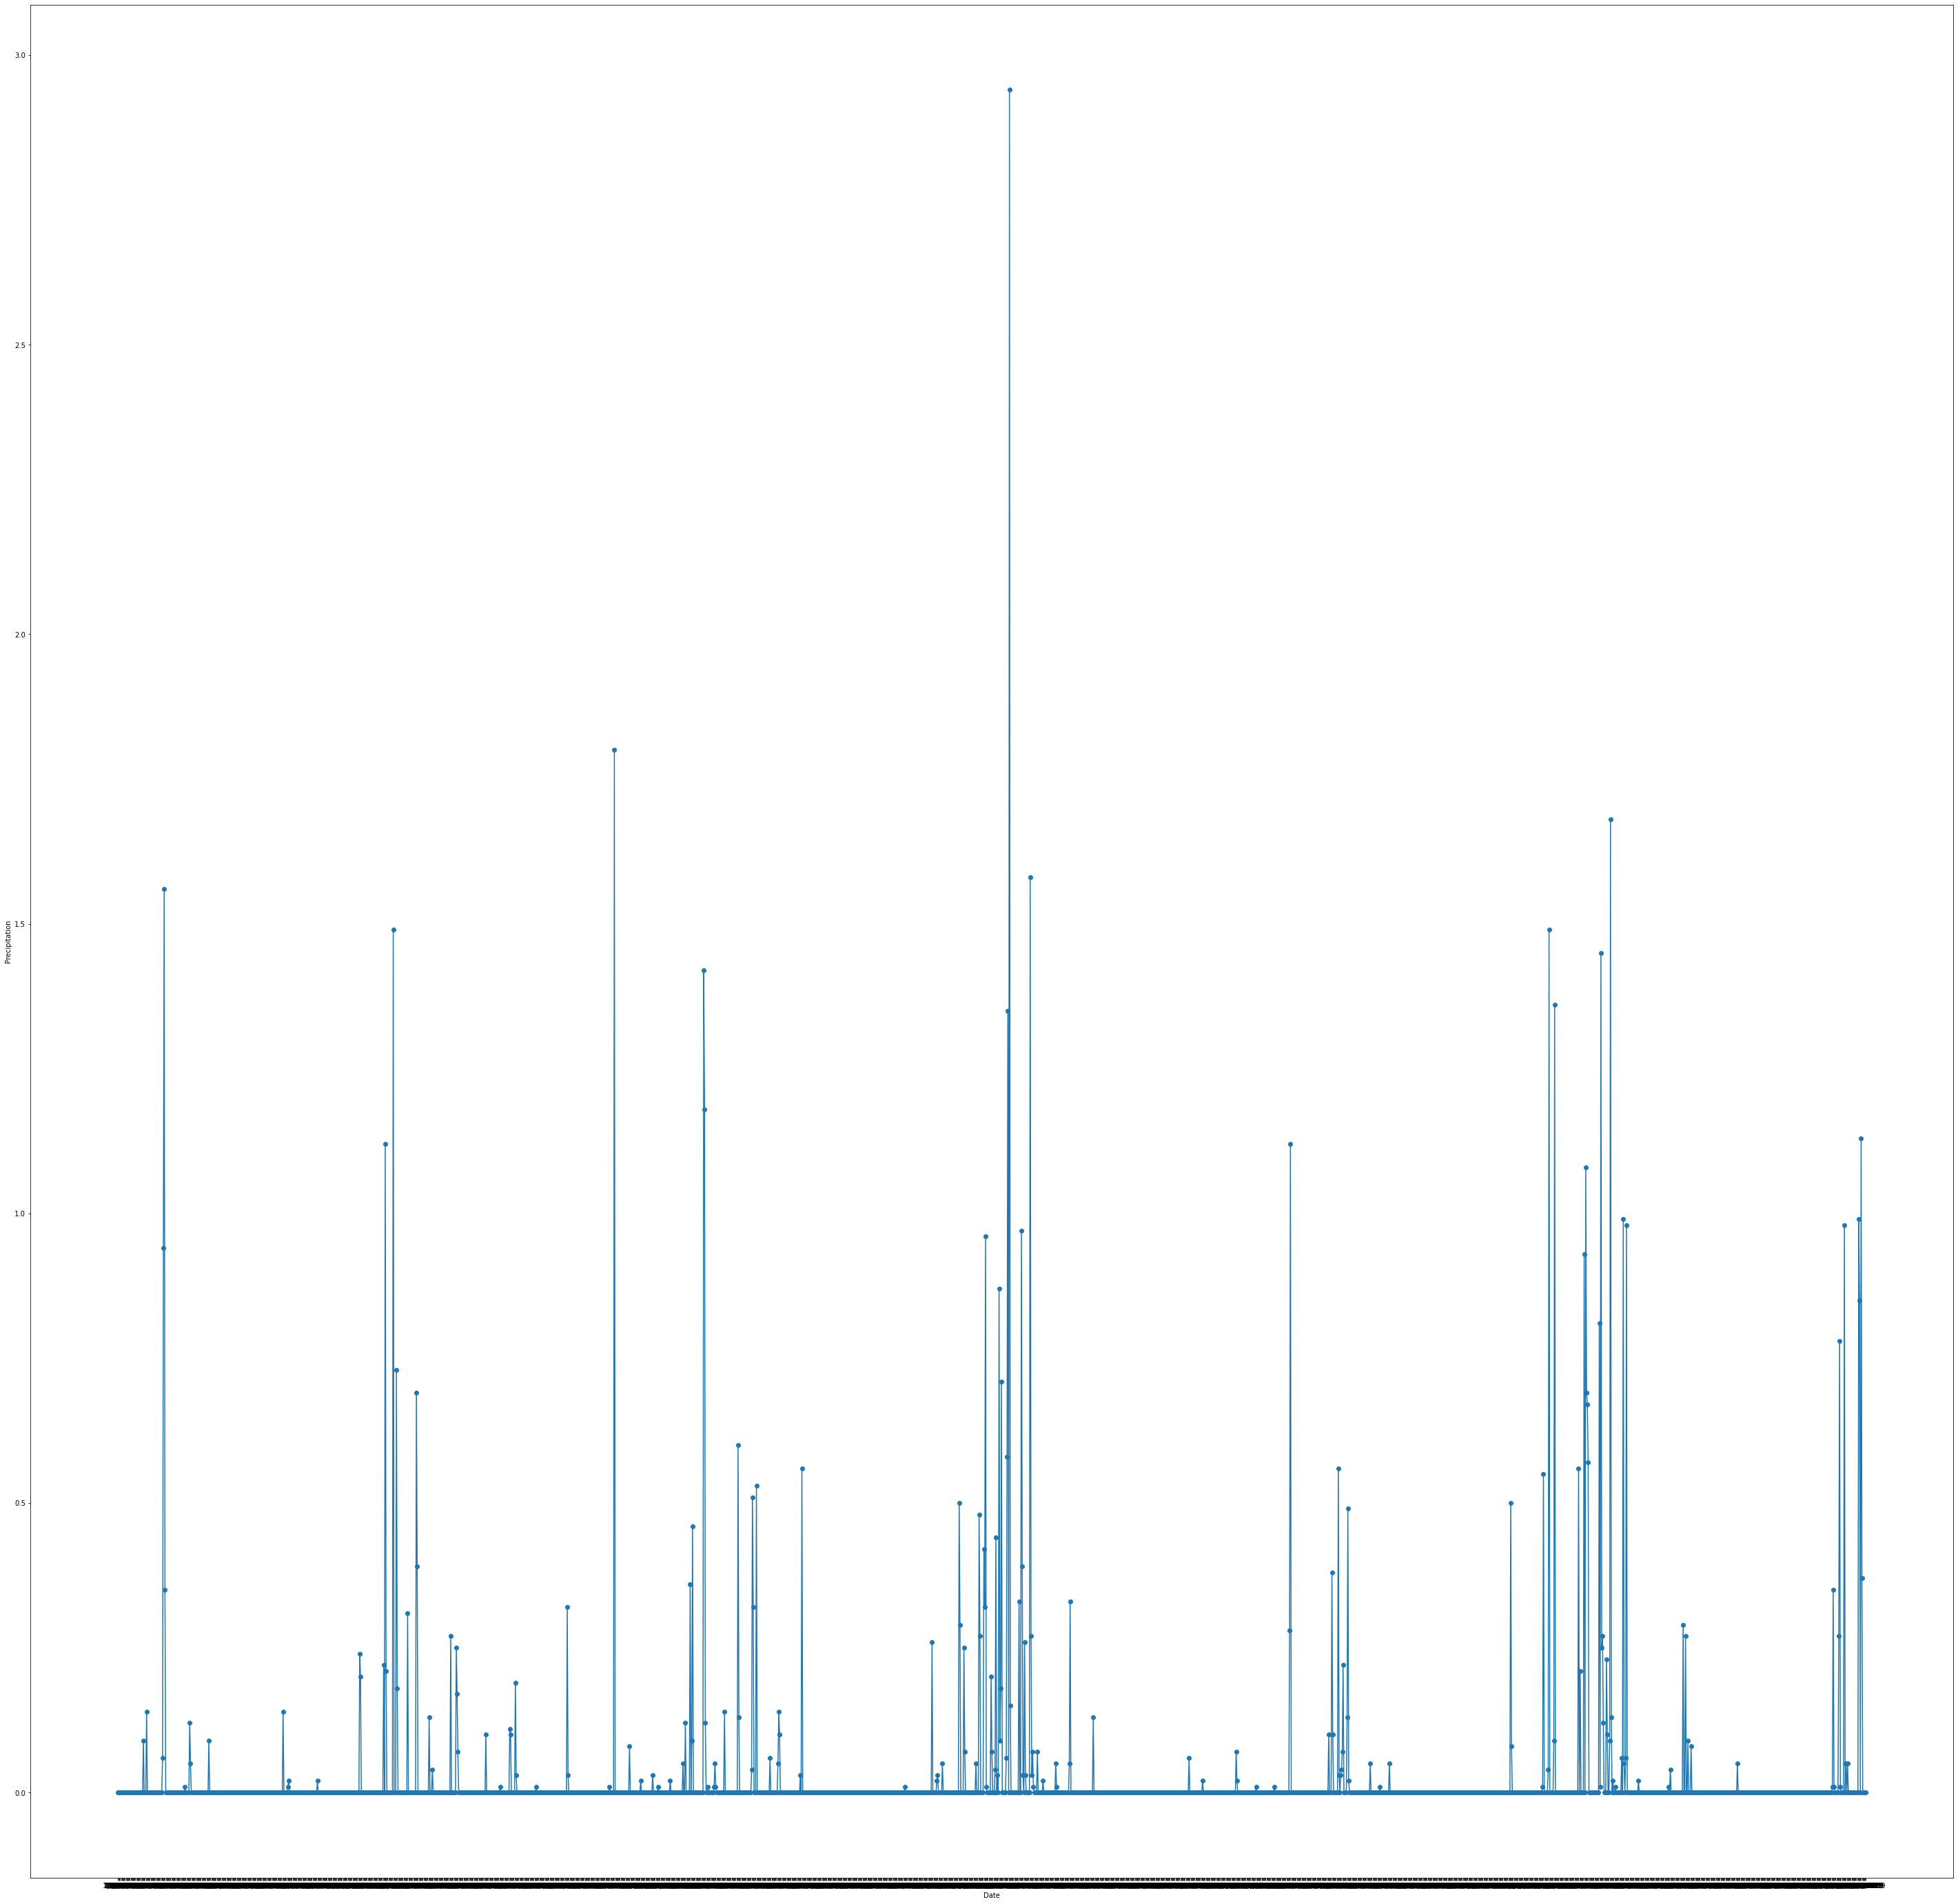

In [60]:
fig,ax=plt.subplots(figsize=(50, 50))
ax.plot(airport_weather_data_df['DATE'],airport_weather['PRCP'], marker="o")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
plt.show()